In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import os
from toolz import pipe
import pandas as pd

from support_functions import *
from micropattern_analysis import *

# Analysis of MPs from Polina's fate experiment

In [2]:
dir = r"C:\Users\flori\OneDrive - Universität Wien\Adameyko Lab\FS9_Polina_Analysis\images"
os.chdir(dir)
dirs = os.listdir(".")
print(dirs)

['all_fates_pax6', 'neural_crest_pax6', 'neural_crest_six1', 'neural_plate_pax6', 'neural_plate_six1', 'placode_pax6', 'placode_six1']


In [64]:
file_names, images = zip(*get_files_and_images(dirs).items())

In [65]:
file_names = list(file_names)
images = list(images)

## Image Preprocessing

### All fates images (PAX6)

In [94]:
def string_list_locations(array, phrase):
    return [i for i, s in enumerate(array) if phrase in s]


def get_items_from_index(array, indexes):
    return list(map(array.__getitem__, indexes))


def delete_from_list(array, indexes):
    return [j for i, j in enumerate(array) if i not in indexes]

In [95]:
cur_images = images[0:3]
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images[0:3]
))
cur_images.append(images[3])

IndexError: index 3 is out of bounds for axis 0 with size 3

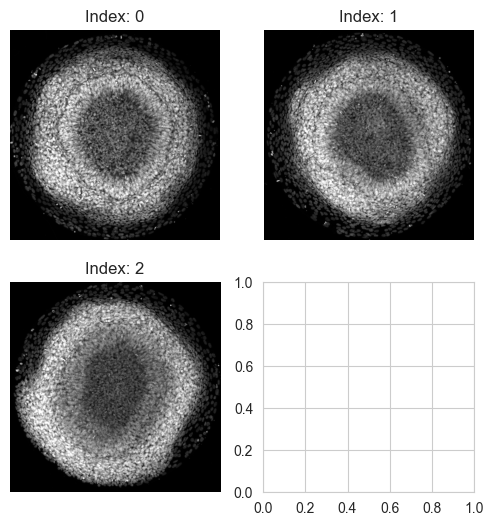

In [67]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(6, 6))

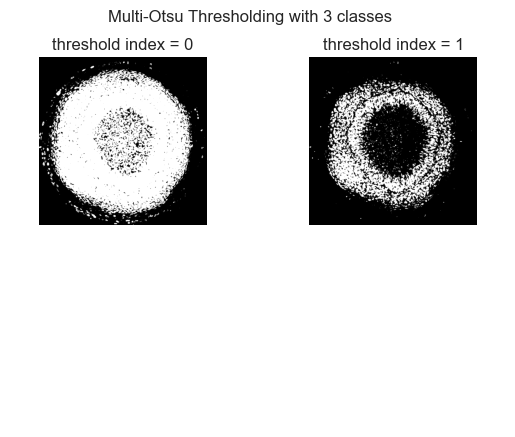

In [68]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [96]:
del cur_images[-1]

dapi_num = 3

images_new = list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
)

file_names_new = file_names[0:3]

### Neural crest fate images (PAX6)

In [97]:
cur_file_indexes = string_list_locations(file_names, "neural_crest_pax6")

cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

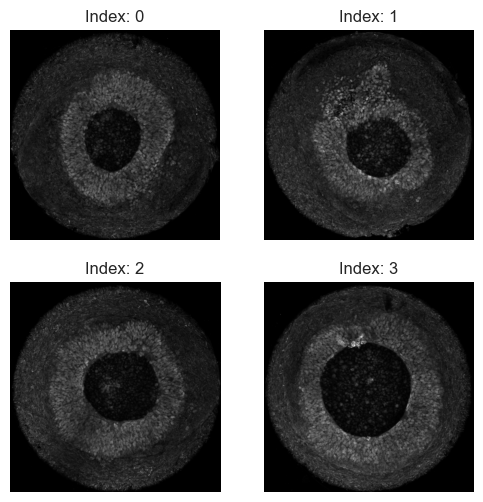

In [70]:
channel = 2
fig, ax = plot_images(cur_images, channel, fig_size=(6, 6))

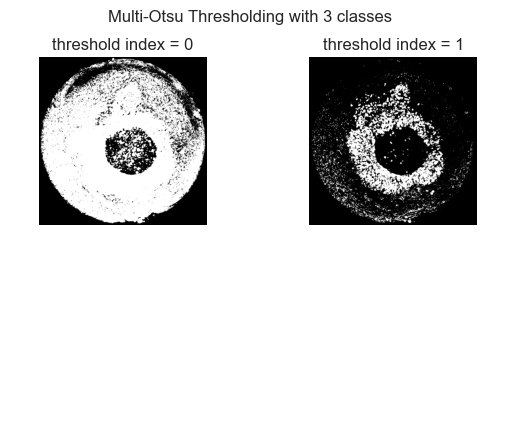

In [71]:
plot_multi_otsu_thresholds(cur_images[1], channel, 3)

In [98]:
del [cur_images[0], cur_images[2], cur_file_indexes[0], cur_file_indexes[2]]

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        #   lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   ^ channel above only background, so no threshold
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural crest fate images (SIX1)

In [99]:
cur_file_indexes = string_list_locations(file_names, "neural_crest_six1")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

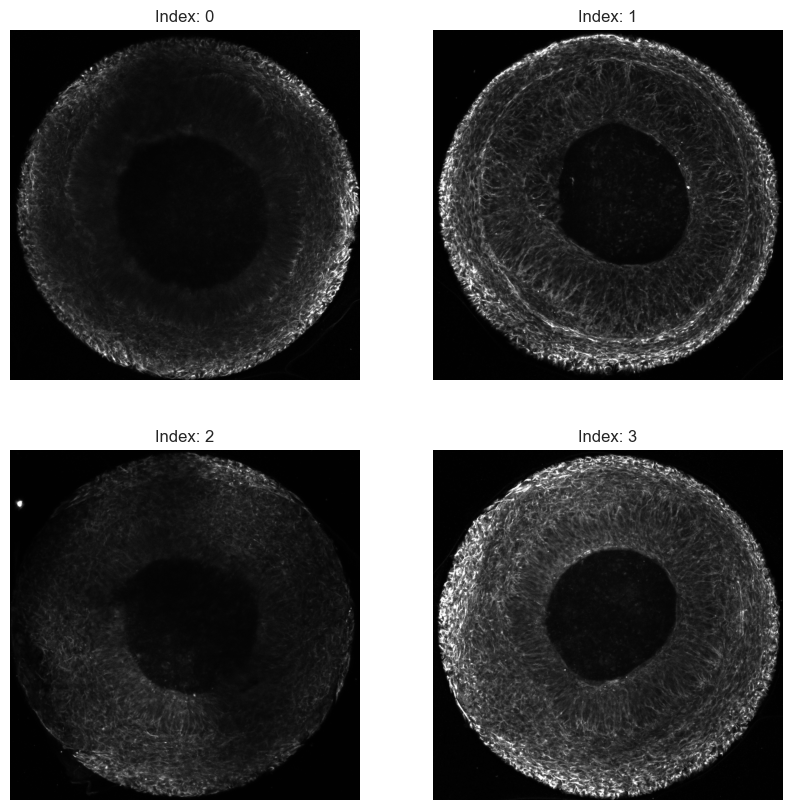

In [73]:
channel = 2
fig, ax = plot_images(cur_images, channel)

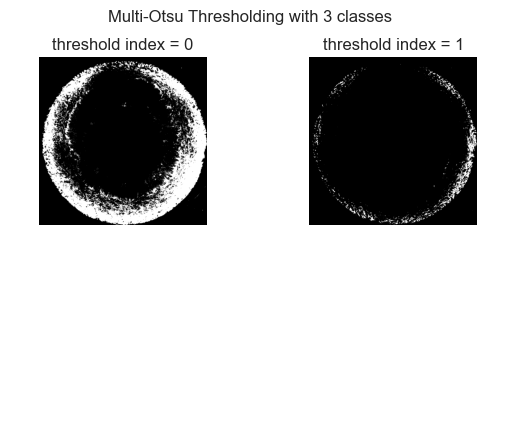

In [74]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [100]:
del [cur_images[2], cur_file_indexes[2]]

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        #   lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   ^ channel above only background, so no threshold
        lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3, threshold_index=0)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural plate fate images (PAX6)

In [101]:
cur_file_indexes = string_list_locations(file_names, "neural_plate_pax6")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

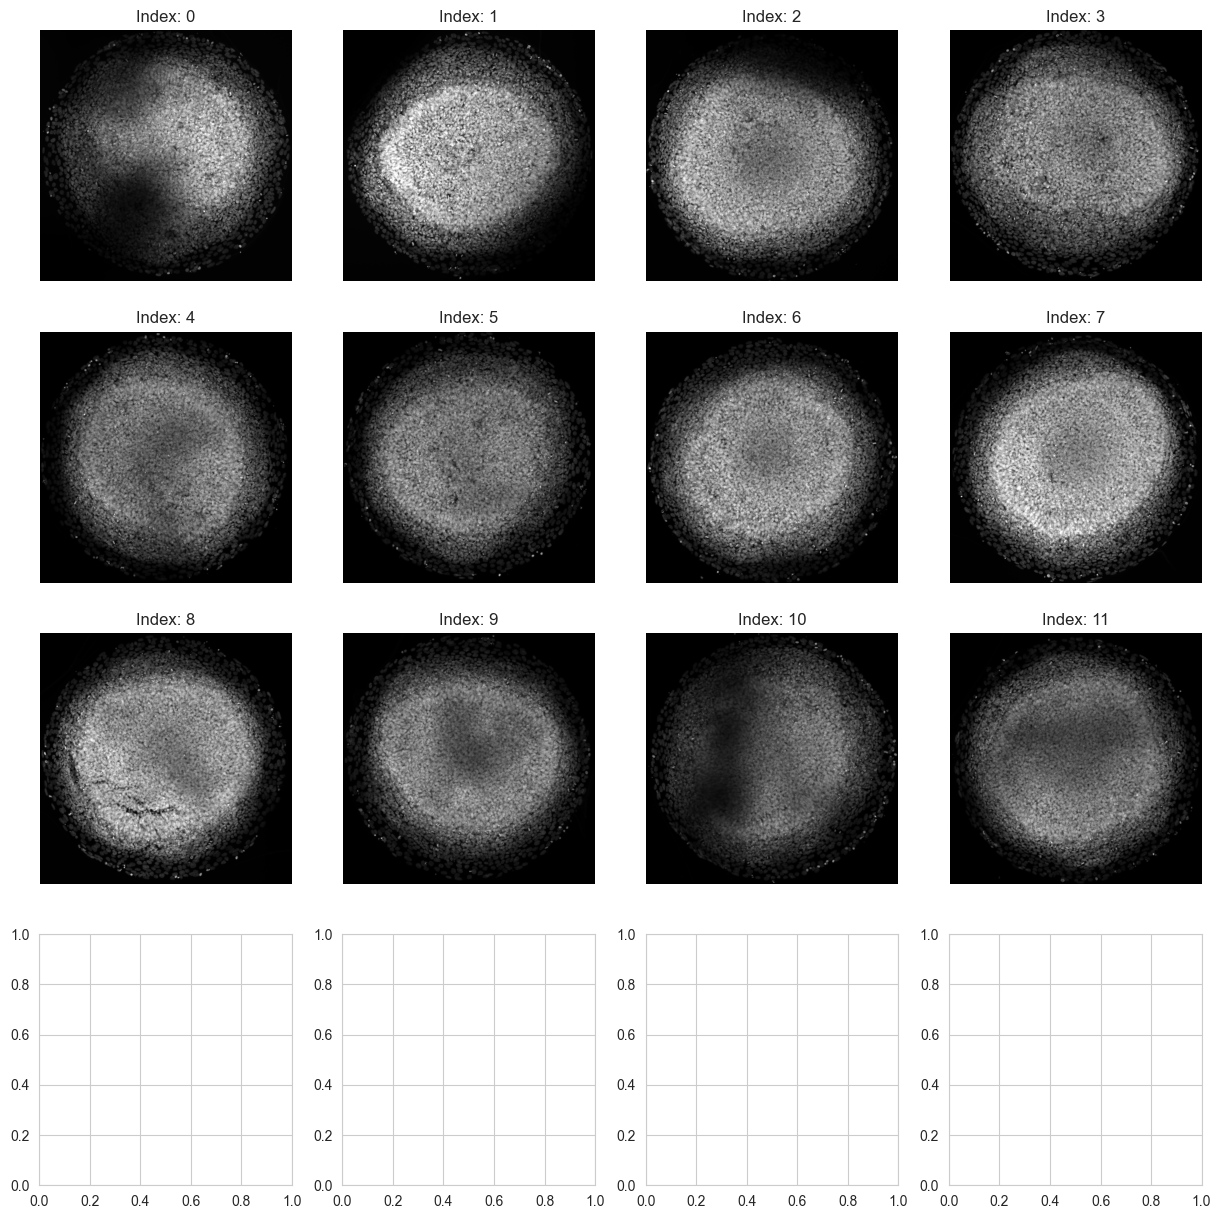

In [76]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

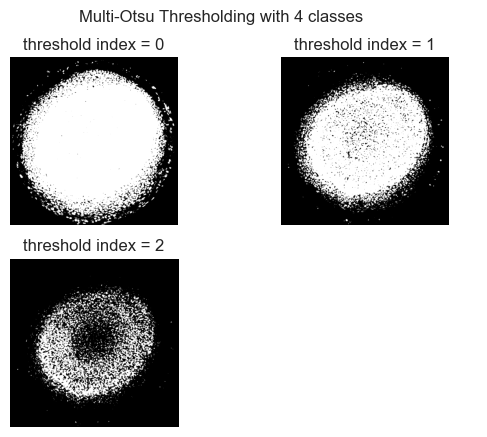

In [77]:
plot_multi_otsu_thresholds(cur_images[7], channel, 4)

In [102]:
index_to_exclude = [0, 2, 10]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(cur_file_indexes, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Neural plate fate images (SIX1)

In [103]:
cur_file_indexes = string_list_locations(file_names, "neural_plate_six1")
cur_images = get_items_from_index(images, cur_file_indexes)
cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    cur_images
))

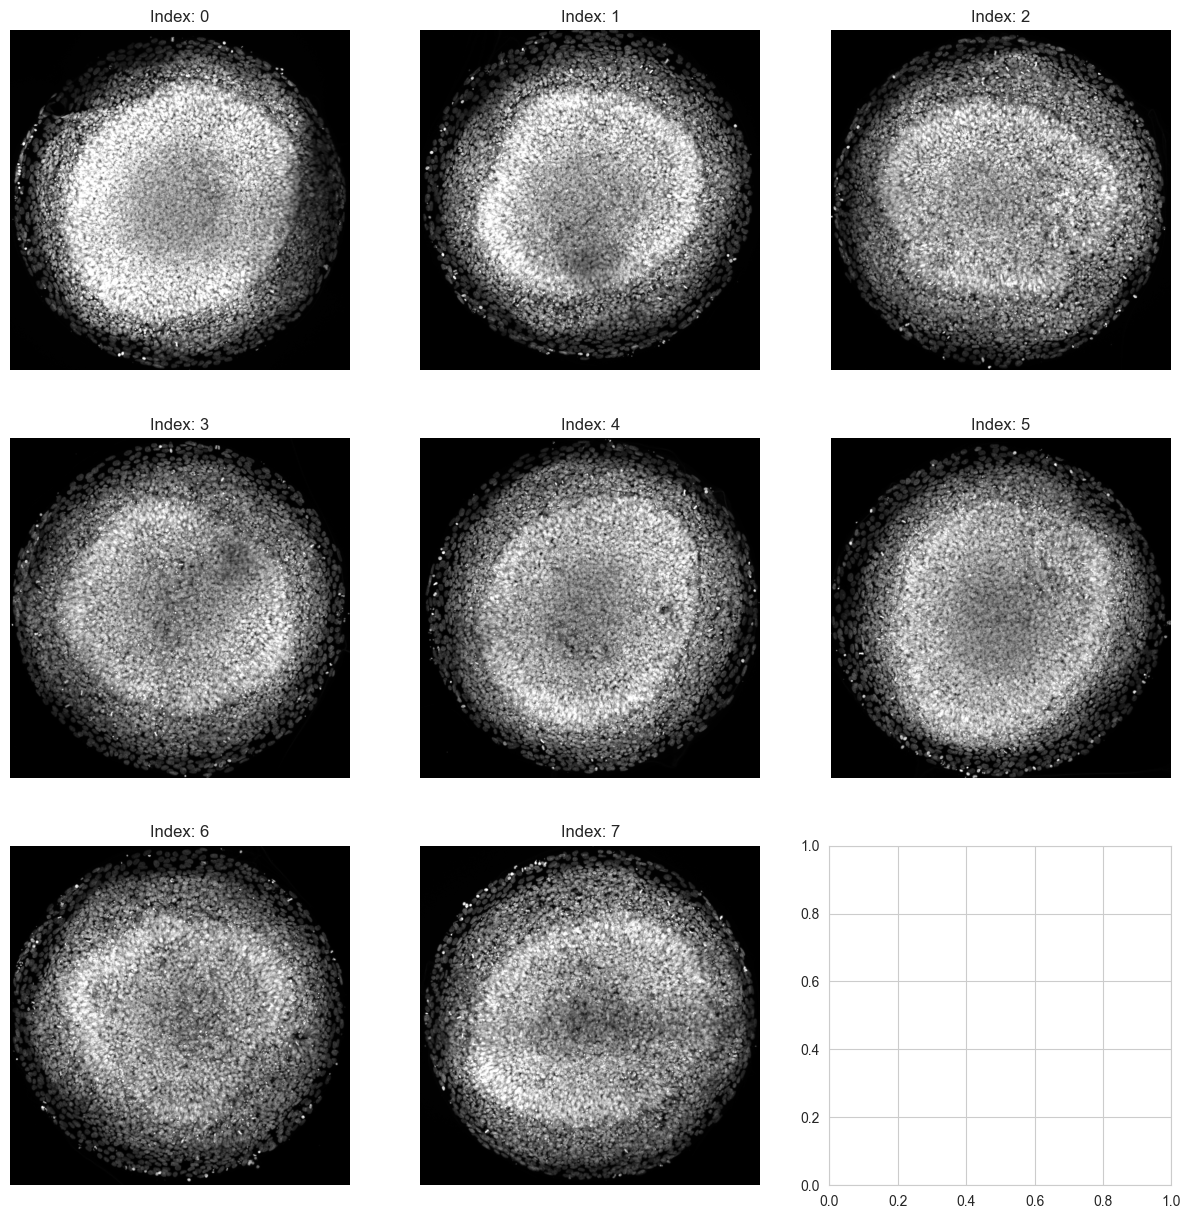

In [79]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

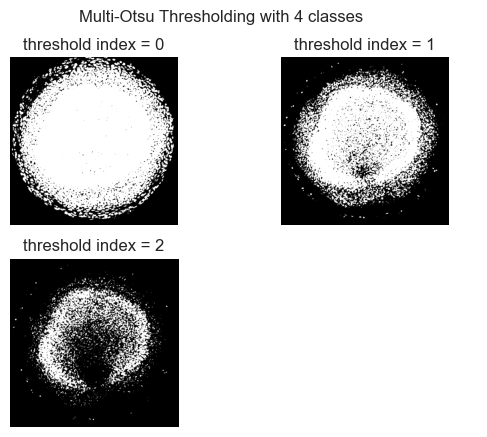

In [80]:
plot_multi_otsu_thresholds(cur_images[1], channel, 4)

In [104]:
index_to_exclude = [2, 3, 6, 7]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(cur_file_indexes, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Placode fate images (PAX6)

In [105]:
cur_file_indexes = string_list_locations(file_names, "placode_pax6")

stack1_index = set(cur_file_indexes).intersection(set(string_list_locations(file_names, "-1")))
stack2_index = set(cur_file_indexes) - set(stack1_index)
stack1_images = get_items_from_index(images, stack1_index)
stack2_images = get_items_from_index(images, stack2_index)

cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    np.array([stack1_images, stack2_images]).reshape((10, 2, 4, 1024, 1024))
))

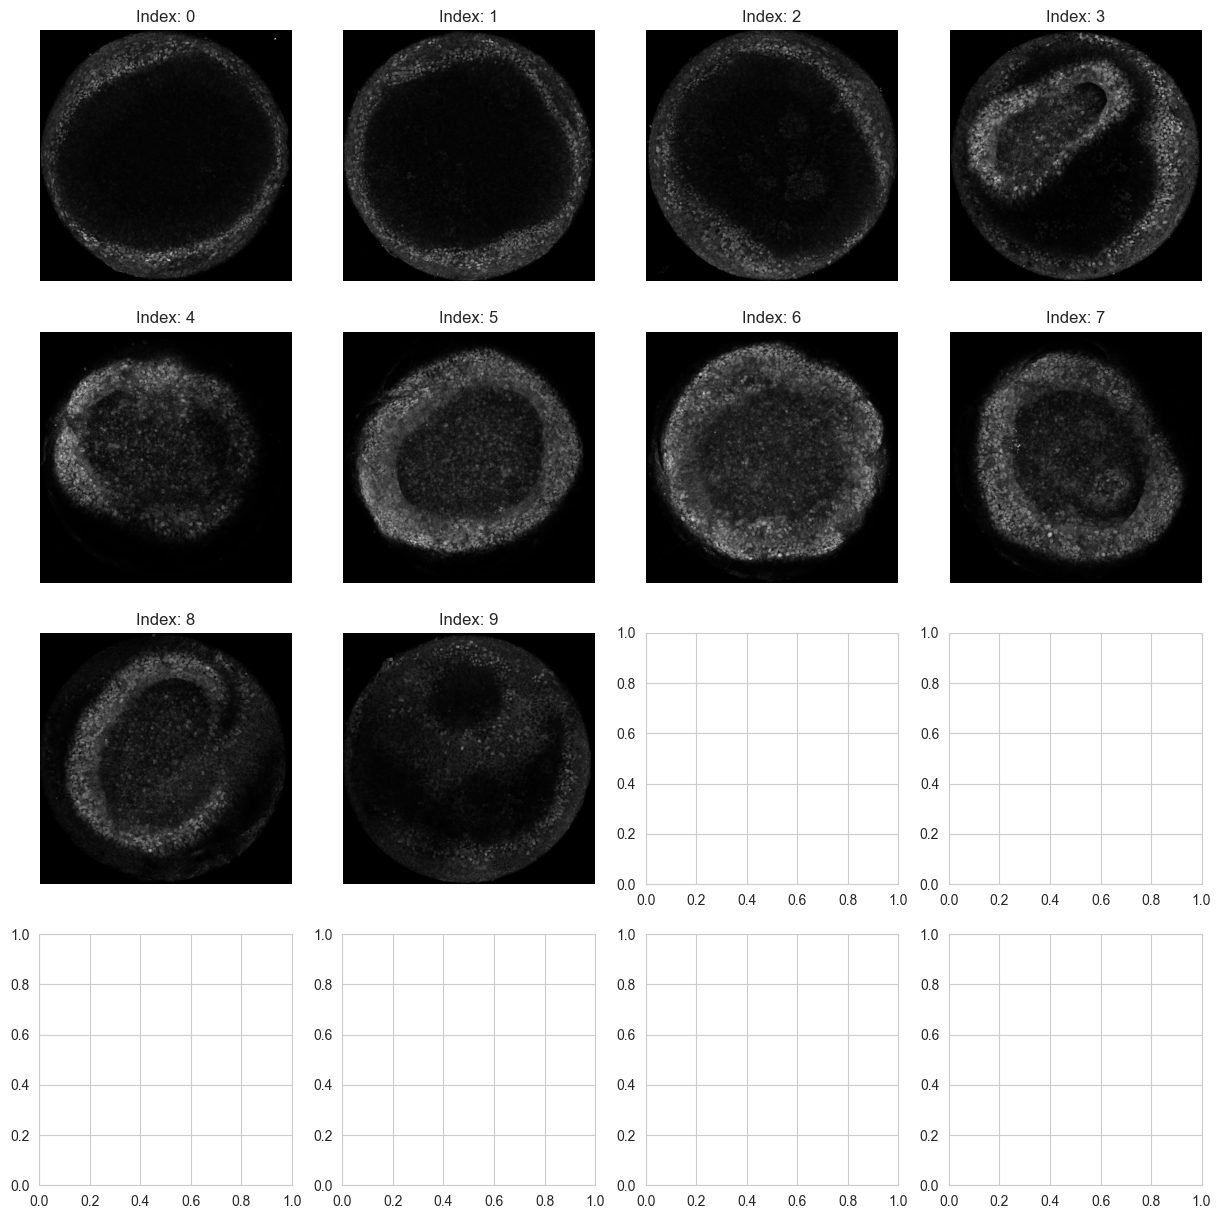

In [83]:
channel = 2
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

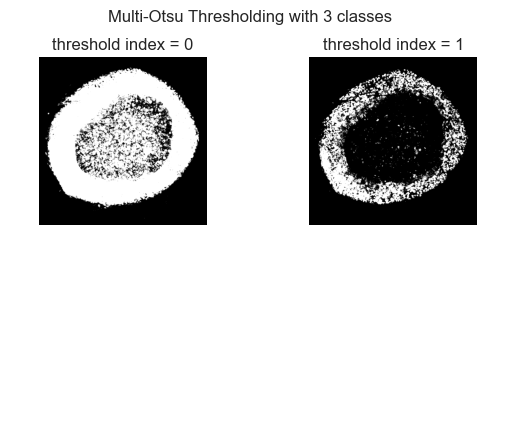

In [84]:
plot_multi_otsu_thresholds(cur_images[5], channel, 3)

In [106]:
index_to_exclude = [3, 4, 5, 6, 7, 8, 9]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(stack1_index, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2, num_classes=3, threshold_index=0)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

### Placode fate images (SIX1)

In [107]:
cur_file_indexes = string_list_locations(file_names, "placode_six1")

stack1_index = set(cur_file_indexes).intersection(set(string_list_locations(file_names, "-1")))
stack2_index = set(cur_file_indexes) - set(stack1_index)
stack1_images = get_items_from_index(images, stack1_index)
stack2_images = get_items_from_index(images, stack2_index)

cur_images = list(map(
    lambda x: maximise_and_normalize(x, bits=16),
    np.array([stack1_images, stack2_images]).reshape((7, 2, 4, 1024, 1024))
))

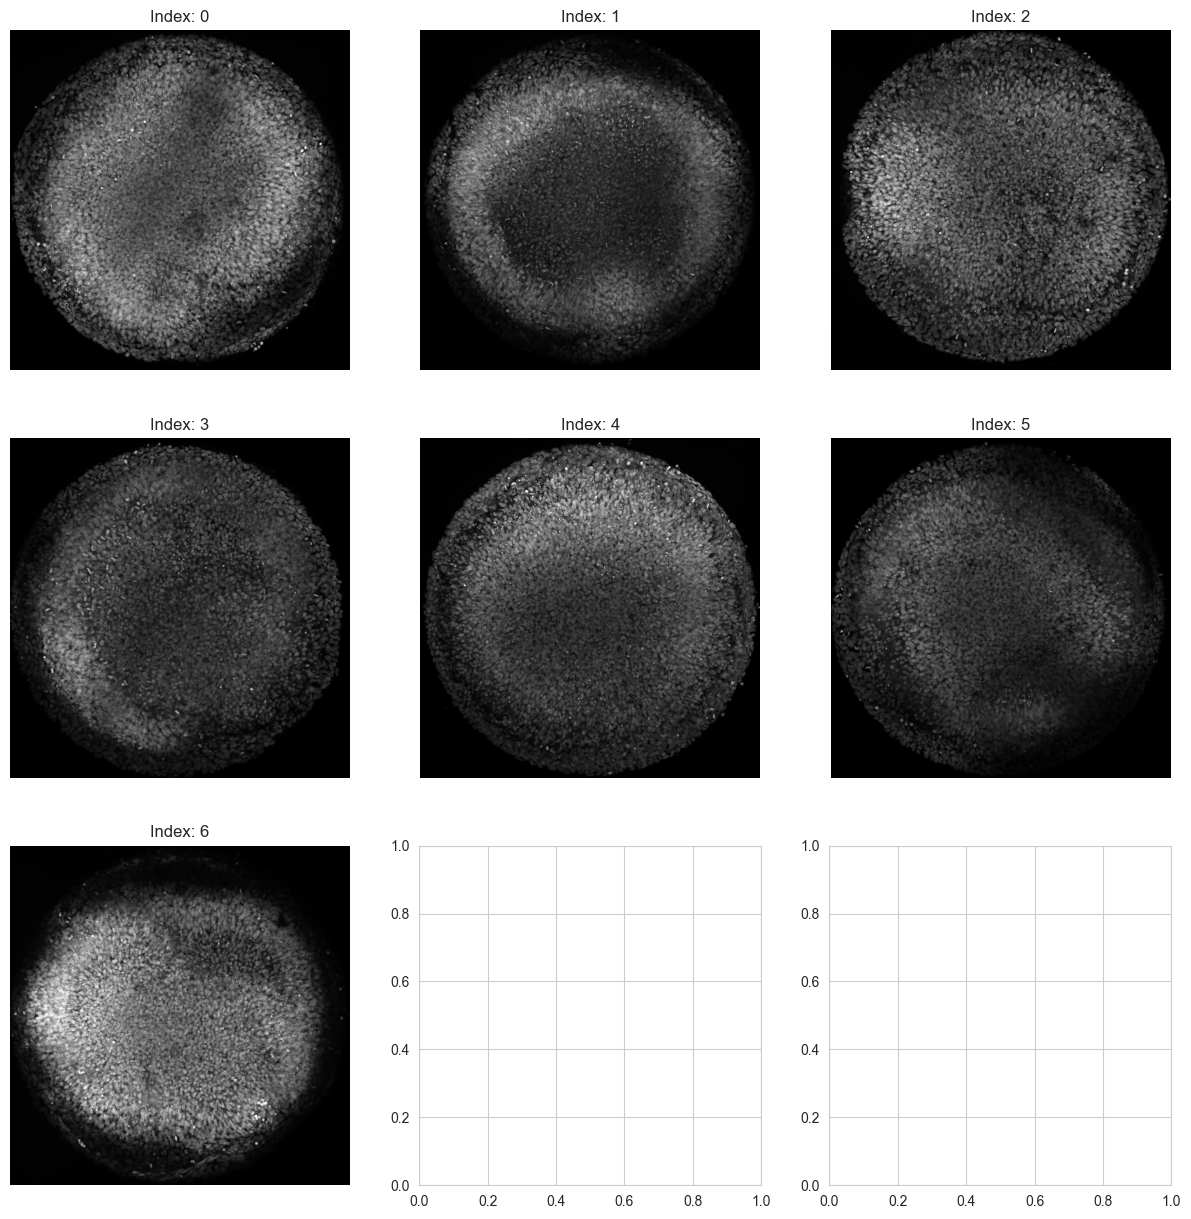

In [87]:
channel = 3
fig, ax = plot_images(cur_images, channel, fig_size=(15, 15))

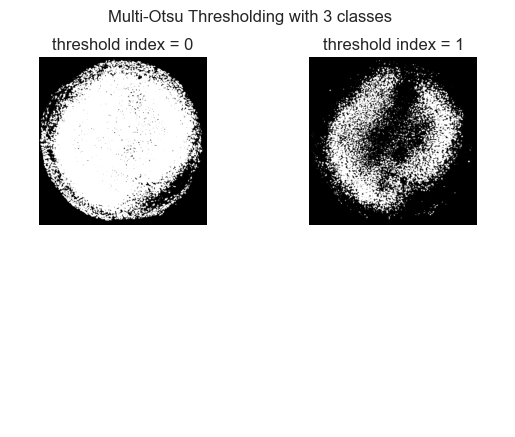

In [88]:
plot_multi_otsu_thresholds(cur_images[0], channel, 3)

In [108]:
index_to_exclude = [1, 5, 6]
cur_images = delete_from_list(cur_images, index_to_exclude)
cur_file_indexes = delete_from_list(stack1_index, index_to_exclude)

dapi_num = 3

images_new.extend(list(map(
    lambda x:
    pipe(
        x,
        lambda f: apply_multiotsu_to_image(f, dapi_num, num_classes=3, threshold_index=0),
        lambda f: apply_multiotsu_to_channel(f, 0, num_classes=3),
        #   lambda f: apply_multiotsu_to_channel(f, 1, num_classes=3, threshold_index=0),
        #   no positive signal
        lambda f: apply_multiotsu_to_channel(f, 2)
    ),
    cur_images)
))

file_names_new.extend(get_items_from_index(file_names, cur_file_indexes))

## Image Processing

In [199]:
def gen_channel_names(file):
    if "Day6" in file:
        file_params = os.path.basename(file).split("Day6")[1].split("_")
        channel_names = file_params[1:8][::2]
    elif "day" in file:
        file_params = os.path.basename(file).split("day")[1].split("_")
        channel_names = file_params[2:9][::2]
    channel_names_raw = list(map(lambda x: x.upper(), channel_names))
    channel_names_final = channel_names_raw[:-1][::-1]
    channel_names_final.append(channel_names_raw[-1])
    return channel_names_final


def get_condition(file):
    file_params = os.path.basename(file).split("_")
    if "crest" in file_params:
        return f'{file_params[0]} {file_params[1]}'
    elif "neural" in file_params:
        return file_params[0]
    else:
        return file_params[1]

In [206]:
df = []

for file, img in zip(file_names_new, images_new):
    df_mini = generate_data_frame(
        expand_coordinate_matrix(img[dapi_num]),
        img,
        gen_channel_names(file),
        Distances=get_distances(img[dapi_num])
    )
    df_mini = scale_distances(df_mini, file=file)
    df_mini = average_distances(df_mini)
    df_mini = smooth_distances(df_mini, gen_channel_names(file))
    df_mini["Condition"] = np.repeat(get_condition(file), df_mini.shape[0])
    df_mini["Staining"] = np.repeat(gen_channel_names(file)[2], df_mini.shape[0])
    df.append(df_mini)

df = pd.concat(df)

In [207]:
df_long = pd.melt(df, id_vars=["Staining", "Distances", "Condition"],
                  value_vars=["PAX6", "SOX10", "ISL12", "SIX1"]).reset_index()
df_long = df_long.groupby(["Condition", "Staining", "Distances", "variable"]).mean()
df_long.reset_index(inplace=True)

In [208]:
def normalize_df(data, fil):
    for f in fil:
        data_filter = (
                (data["Condition"] == f[0]) &
                (data["Staining"] == f[1]) &
                (data["variable"] == f[2])
        )
        cur_data = data.loc[data_filter, "value"]
        data.loc[data_filter, "value"] = gaussian_filter(cur_data, 10)
        data.loc[data_filter, "value"] = ((cur_data - cur_data.min()) /
                                          (cur_data.max() - cur_data.min()))
    return data

In [209]:
data_filter = np.column_stack((
    np.repeat(np.array([["fates", ], ["neural", ], ["neural crest", ], ["placode", ]]), [4, 8, 8, 8], axis=0),
    np.delete(np.tile(np.repeat(np.array([["PAX6", ], ["SIX1", ]]), 4), 4), np.s_[4:8]),
    np.delete(np.tile(["ISI12", "SOX10", "PAX6", "SIX1"], 8), np.s_[4:8])
))
normalize_df(df_long, data_filter)

Condition Staining   Distances variable         index     value
0         fates     PAX6    0.000000    ISL12  42183.666667  0.000738
1         fates     PAX6    0.000000     PAX6    739.666667  0.622007
2         fates     PAX6    0.000000     SIX1  62905.666667       NaN
3         fates     PAX6    0.000000    SOX10  21461.666667  0.024684
4         fates     PAX6    0.691888    ISL12  42184.666667  0.000741
...         ...      ...         ...      ...           ...       ...
21039   placode     SIX1  527.910774    SOX10  41442.000000  0.000000
21040   placode     SIX1  528.602662    ISL12  62165.000000  0.000000
21041   placode     SIX1  528.602662     PAX6  20721.000000       NaN
21042   placode     SIX1  528.602662     SIX1  82887.000000  0.000000
21043   placode     SIX1  528.602662    SOX10  41443.000000  0.000000

[21044 rows x 6 columns]

<Axes: xlabel='Distances', ylabel='value'>

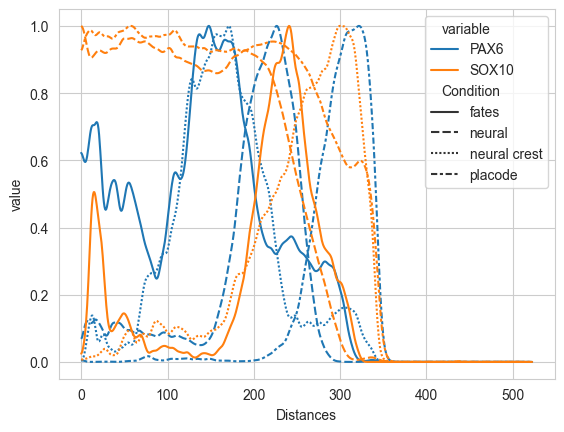

In [211]:
data = df_long.loc[
    (df_long["Staining"] == "PAX6") & 
    #(df_long["Condition"].isin(["fates", "neural crest"])) &
    (df_long["variable"].isin(["PAX6", "SOX10"]))
]
sns.lineplot(data=data,
             x="Distances",
             y="value",
             hue="variable",
             style="Condition")